In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
Dataset = pd.read_csv(r'C:\Users\gvi7cob\Documents\AI\BodyFat_Prediction\bodyfat.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Dataset.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
# Dependant and Independant Variable Split
# Since Density is tough to calculate we will try to develop a model with Density and predict BodayFat
def X_y_Split(df):
    y = df['BodyFat']
    X = df.drop(['BodyFat'], axis = 1)
    return X,y

In [6]:
X,y = X_y_Split(Dataset)

In [7]:
#test train splitter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [8]:
#Mean Square Error Between Prediction and Actual
def mse(y_pred,y_act):
    return sum(((y_pred - y_act)**2))/len(y_act)

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20,random_state=12)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
print('Train_Error:',mse(y_train_pred,y_train))
print('Test_Error:',mse(y_pred,y_test))

Train_Error: 0.27611570796460155
Test_Error: 0.8449269230769237


In [10]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criteria to decide purity of split
criterion = ['mse', 'mae']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion':criterion}

In [11]:
from pprint import pprint
print('Parameters range in use:\n')
pprint(random_grid)

Parameters range in use:

{'bootstrap': [True, False],
 'criterion': ['mse', 'mae'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 10],
 'min_samples_split': [2, 5, 10, 20],
 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}


In [12]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor(n_estimators=20,random_state=12)
random_regressor = RandomizedSearchCV(estimator = rfr,param_distributions = random_grid,n_iter = 100,cv=3,verbose=2,random_state = 12)

random_regressor.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=mse, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, criterion=mse, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, criterion=mse, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=160; total time=   0.4s
[CV] END bootstrap=Fal

[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=mae, max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=mse, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=mse, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=mse, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=mse, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.1s
[CV] END bootstrap=True, criterion=mse, max_depth=90, max_features=log2, min_samples

[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=160; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=160; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END bootstrap=True, criterion=mse, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=mse, max_depth=100, max_features=sqrt, min_samples_leaf=

[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, criterion=mae, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, criterion=mse, max_depth=10, max_features=sqrt, min_sampl

[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, criterion=mae, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=mse, max_depth=90, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=180; total time=   0.1s
[CV] END bootstrap=True, criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=180; total time=   0.1s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.0s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.0s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=90, max_features=log2, min_samples_lea

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=20,
                                                   random_state=12),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
         

In [13]:
RandomSearch_Best_rf = random_regressor.best_estimator_

In [14]:
RandomSearch_Best_rf.fit(X_train,y_train)
y_train_pred = RandomSearch_Best_rf.predict(X_train)
y_pred = RandomSearch_Best_rf.predict(X_test)
print('Train_Error:',mse(y_train_pred,y_train))
print('Test_Error:',mse(y_pred,y_test))

Train_Error: 1.6634294247787607
Test_Error: 1.3983152692307526


In [15]:
random_regressor.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 110,
 'criterion': 'mae',
 'bootstrap': False}

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 65, stop = 95, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [10]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True]
#Criteria to decide purity of split
criterion = ['mae']

parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion':criterion}


In [17]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(n_estimators=20,random_state=2)
grid_rf_regressor = GridSearchCV(estimator = rfr,param_grid = parameter_grid,cv=3,verbose=2)

grid_rf_regressor.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=65; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=65; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=65; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=68; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=68; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=68; total time=   0.0s
[CV] END bootstrap=True, criterion=mae

[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=91; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=91; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=65; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=1, min_sam

[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=88; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=88; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=91; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=91; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=91; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_sam

[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=81; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=88; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=88; total time=   0.2s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=2, min_sam

[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=78; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=78; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=78; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=81; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=81; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=81; total time=   0.1s
[CV] END bootstrap=True, criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=3, min_sam

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=20, random_state=2),
             param_grid={'bootstrap': [True], 'criterion': ['mae'],
                         'max_depth': [10], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [65, 68, 71, 75, 78, 81, 85, 88, 91,
                                          95]},
             verbose=2)

In [18]:
Grid_Best_rf = grid_rf_regressor.best_estimator_
Grid_Best_rf.fit(X_train,y_train)
y_train_pred = RandomSearch_Best_rf.predict(X_train)
y_pred = RandomSearch_Best_rf.predict(X_test)
print('Train_Error:',mse(y_train_pred,y_train))
print('Test_Error:',mse(y_pred,y_test))

Train_Error: 1.6634294247787607
Test_Error: 1.3983152692307526


In [19]:
grid_rf_regressor.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 85}

In [20]:
Grid_Best_rf.estimators_

[DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=1872583848),
 DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=794921487),
 DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=111352301),
 DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=1853453896),
 DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=213298710),
 DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=1922988331),
 DecisionTreeRegressor(criterion='mae', max_depth=10, max_features='auto',
                       min_samples_leaf=2, random_state=18696954

[Text(1707.421875, 2567.0, 'X[0] <= 1.057\nmae = 6.601\nsamples = 141\nvalue = 20.3'),
 Text(1118.90625, 2265.0, 'X[0] <= 1.043\nmae = 3.872\nsamples = 76\nvalue = 24.75'),
 Text(639.375, 1963.0, 'X[0] <= 1.032\nmae = 2.871\nsamples = 39\nvalue = 28.0'),
 Text(290.625, 1661.0, 'X[0] <= 1.027\nmae = 2.273\nsamples = 16\nvalue = 32.3'),
 Text(116.25, 1359.0, 'X[0] <= 1.015\nmae = 2.179\nsamples = 8\nvalue = 33.6'),
 Text(58.125, 1057.0, 'mae = 3.7\nsamples = 2\nvalue = 43.8'),
 Text(174.375, 1057.0, 'X[5] <= 117.7\nmae = 1.192\nsamples = 6\nvalue = 33.25'),
 Text(116.25, 755.0, 'X[5] <= 107.25\nmae = 0.4\nsamples = 4\nvalue = 32.9'),
 Text(58.125, 453.0, 'mae = 0.24\nsamples = 2\nvalue = 32.9'),
 Text(174.375, 453.0, 'mae = 0.25\nsamples = 2\nvalue = 33.6'),
 Text(232.5, 755.0, 'mae = 0.067\nsamples = 2\nvalue = 35.0'),
 Text(465.0, 1359.0, 'X[0] <= 1.03\nmae = 0.783\nsamples = 8\nvalue = 30.4'),
 Text(406.875, 1057.0, 'X[13] <= 18.95\nmae = 0.42\nsamples = 4\nvalue = 31.2'),
 Text(348.7

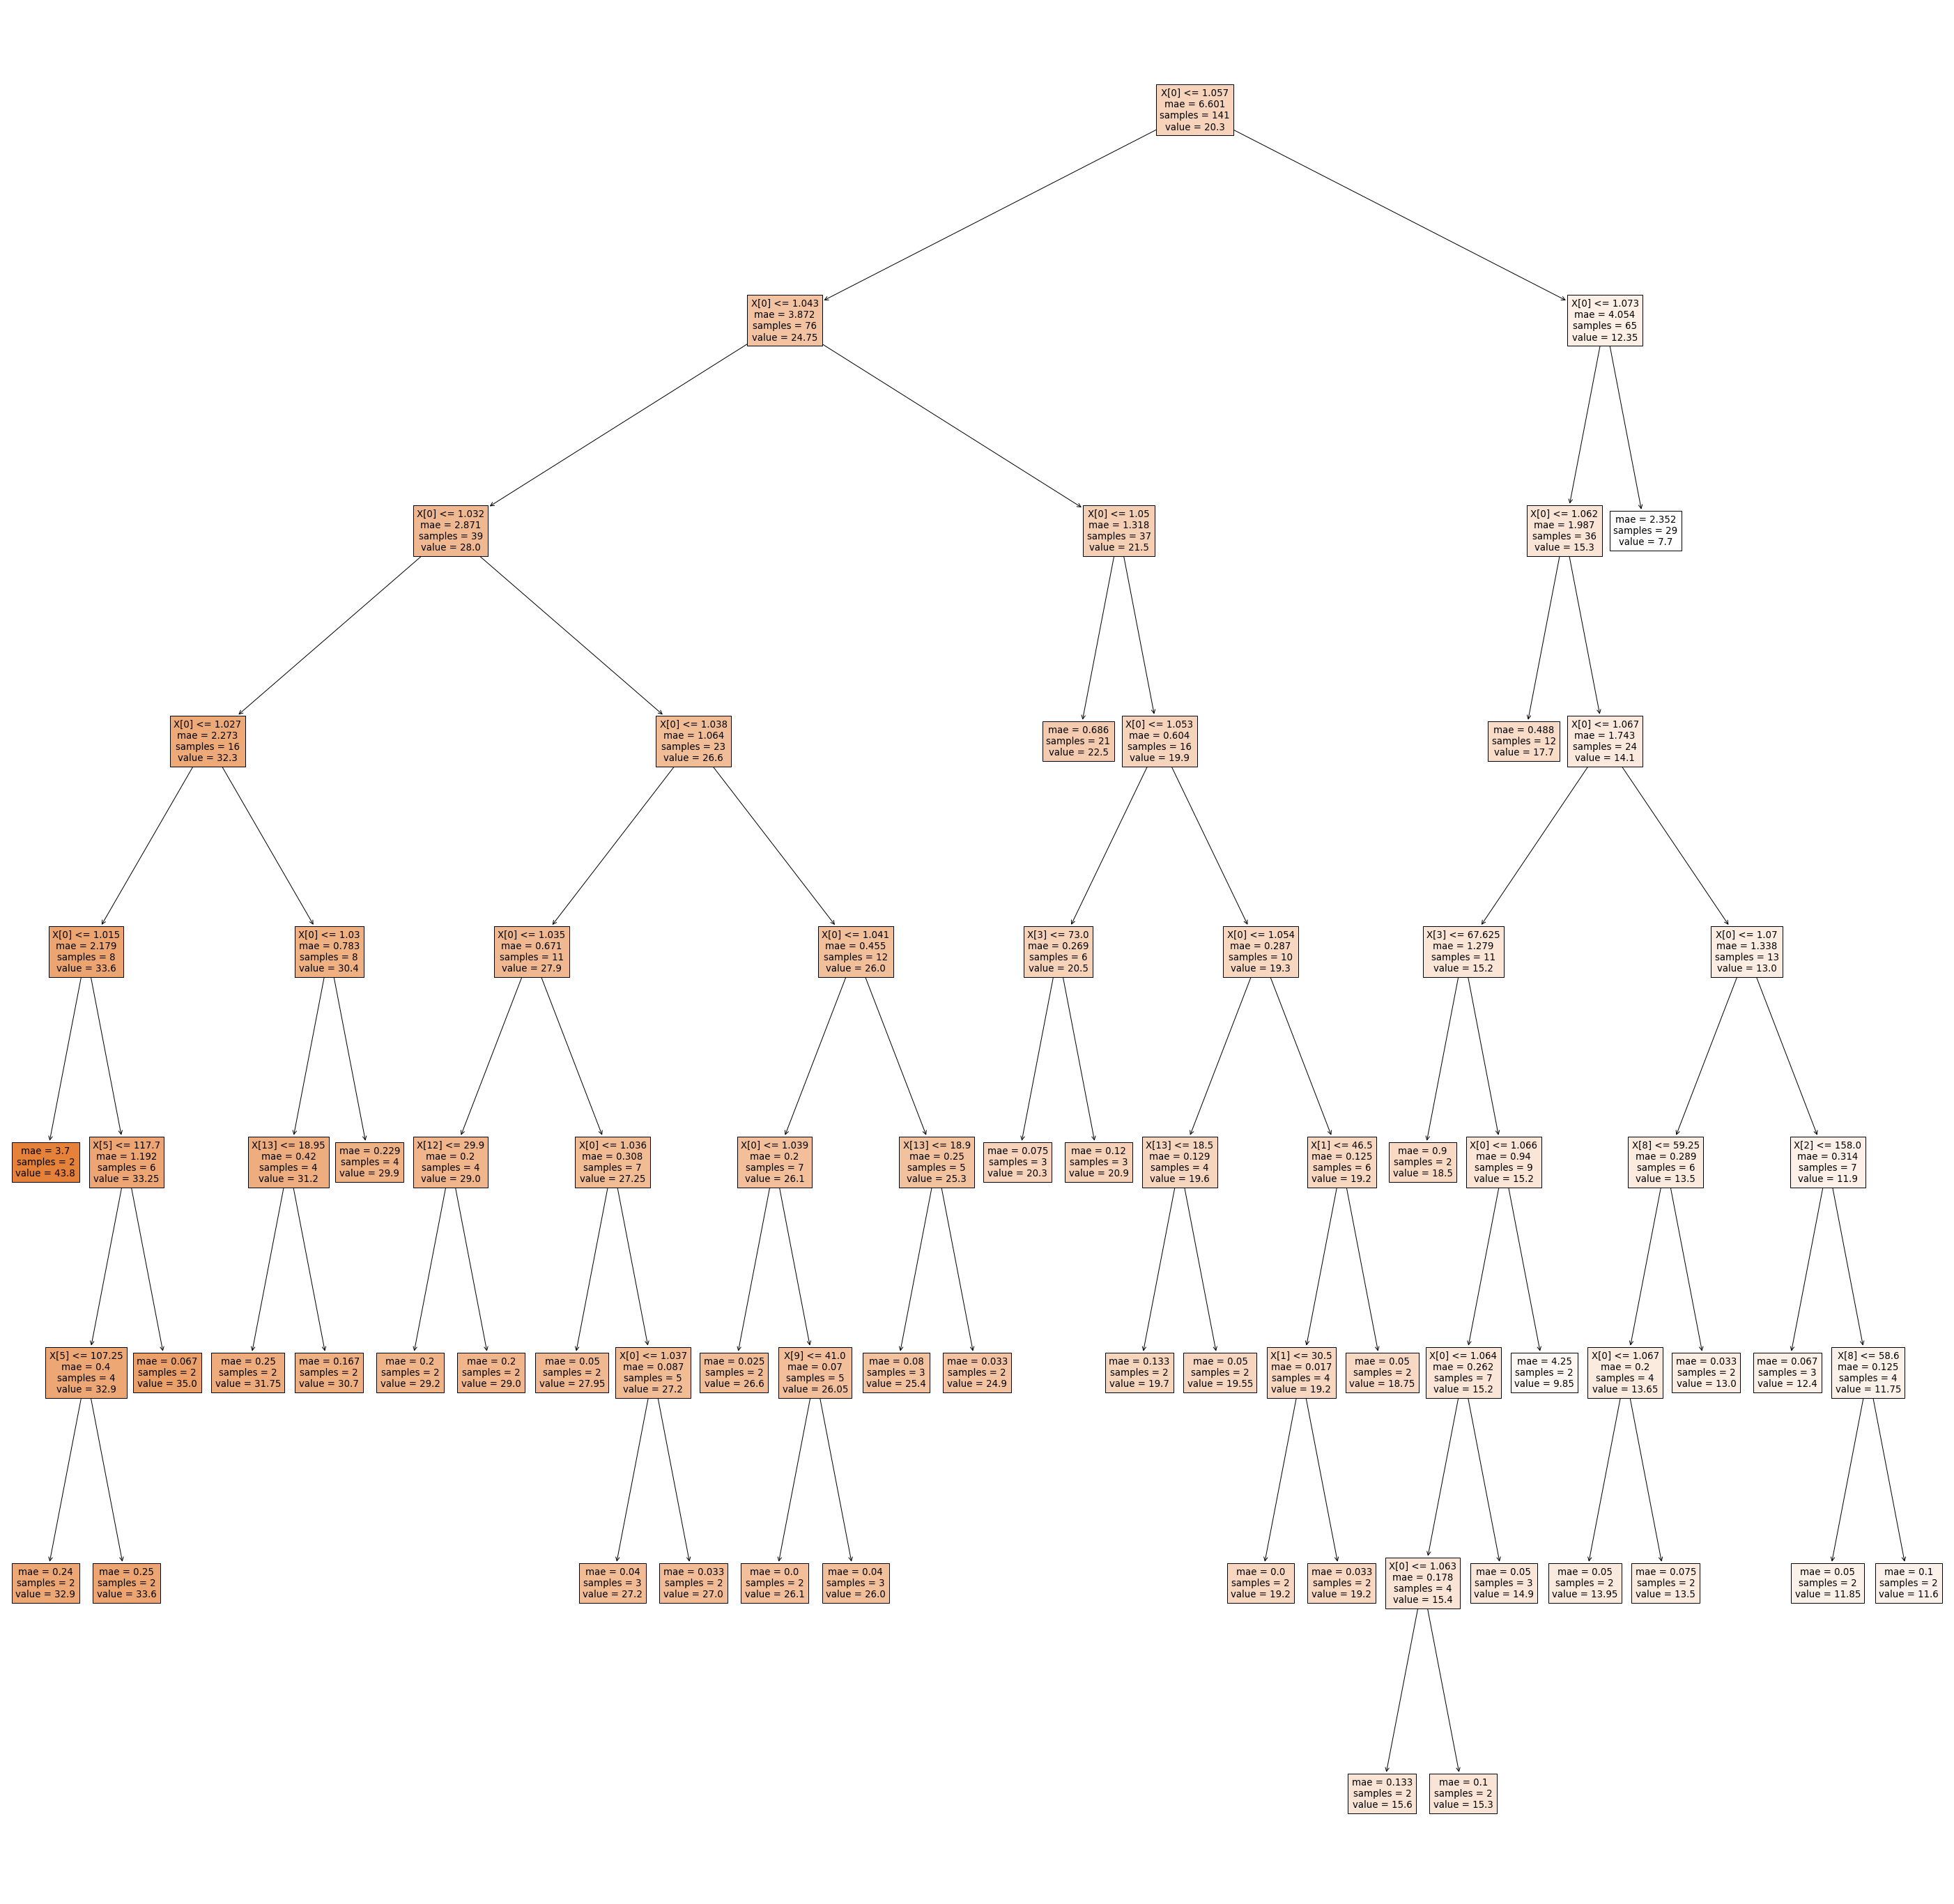

In [21]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(Grid_Best_rf.estimators_[0],filled = True)

In [22]:
for i in range(len(Grid_Best_rf.estimators_)):
    print(tree.export_text(Grid_Best_rf.estimators_[i]))

|--- feature_0 <= 1.06
|   |--- feature_0 <= 1.04
|   |   |--- feature_0 <= 1.03
|   |   |   |--- feature_0 <= 1.03
|   |   |   |   |--- feature_0 <= 1.02
|   |   |   |   |   |--- value: [43.80]
|   |   |   |   |--- feature_0 >  1.02
|   |   |   |   |   |--- feature_5 <= 117.70
|   |   |   |   |   |   |--- feature_5 <= 107.25
|   |   |   |   |   |   |   |--- value: [32.90]
|   |   |   |   |   |   |--- feature_5 >  107.25
|   |   |   |   |   |   |   |--- value: [33.60]
|   |   |   |   |   |--- feature_5 >  117.70
|   |   |   |   |   |   |--- value: [35.00]
|   |   |   |--- feature_0 >  1.03
|   |   |   |   |--- feature_0 <= 1.03
|   |   |   |   |   |--- feature_13 <= 18.95
|   |   |   |   |   |   |--- value: [31.75]
|   |   |   |   |   |--- feature_13 >  18.95
|   |   |   |   |   |   |--- value: [30.70]
|   |   |   |   |--- feature_0 >  1.03
|   |   |   |   |   |--- value: [29.90]
|   |   |--- feature_0 >  1.03
|   |   |   |--- feature_0 <= 1.04
|   |   |   |   |--- feature_0 <= 1.04
| 